7_로지스틱 회귀 복습<br>
- 분류 알고리즘
- 선형 방정식을 학습
  - z = aｘ무게 + bｘ길이 + cｘ대각선 + dｘ높이 + eｘ두께 + f
- 이를 분류로 바꾸기 위해서 z 값을 시그모이드 함수에 넣는다.(확률을 얻는다.)
  - z가 확률이 되려면 0~1 사이 값이 되어야한다.
  - 0.5보다 크면 양성 클래스, 작으면 음성 클래스 (2진분류에서)
- decision_function
  - 선형함수의 z값만 보고 0보다 크면 양성클래스, 0보다 작으면 음성 클래스라고 판단한다.
  - predict가 이 함수를 이용한다.(시그모이드 함수를 통과하지 않고 예측)
- predict_proba
  - 시그모이드 함수를 통과하여 예측하고 싶을 때 사용
<br><br>

# 확률적 경사 하강법

머신러닝 뿐만 아니라 딥러닝에서도 많이 사용.<br>
너무 이론적으로 깊게 들어가지 않고 가능하면 직관적으로 이해해 볼 수 있도록 학습 할 예정..

<br><br>
처음부터 모델을 훈련하지 않고, 기존의 모델을 업데이트 할 순 없을까?<br>

**w(가중치)**와 **b(절편)**을 유지하면서 업데이트
- 점진적 합습
  - 모델을 서비스 하는 도중, 또는 잠시 서비스를 중지하고 업데이트
- 온라인 학습
  - 모델을 서비스 하는 도중 업데이트
  - 학습하면서 업데이트 진행

<br>
선형 회귀, K-최근접 알고리즘, 로지스틱 회귀 알고리즘처럼 알고리즘이 아닌 훈련 방법 중 하나이다.<br><br>


**확률적 경사 하강법**
: 랜덤 기울기 조금씩 내려가는 방법<br><br>

샘플을 하나씩 꺼내서 훈련(조금씩 경사를 따라 이동)<br> ↕<br>
반복<br> ↓<br>
훈련세트를 모두 소진했다면?(1 에포크 완료)<br> ↓<br>
훈련세트에 샘플을 모두 채우고 다시 시작
<br> ↓<br>
...<br>
에포크를 1번 이상 반복<br><br>

샘플을 꺼낼 때
- 1개씩 꺼내기 : 확률적 경사 하강법
- 여러 개씩 꺼내기 : 미니배치 경사 하강법
  - 미니배치의 개수도 하이퍼파라미터라고 할 수 있다.
  - 2의 배수로 하는 것이 일반적이다.
- 몽땅 꺼내기 : 배치 경사 하강법


<br><br>
## 손실 함수
머신러닝 알고리즘의 나쁜 정도를 측정하는 함수<br>
**값이 낮아지는 쪽으로 w,b 값들을 바꾼다.**<br><br>

분류에서의 손실은 <u>정확도</u>를 봤다. 4개중에 2개만 맞으면 정확도는 0.5 인 것이다.<br>이 예시에서 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯 가지 뿐이다.(구간이 있다)<br>
손실 함수는 부드러운 <u>곡면</u>을 가지고 있어야 하므로 **정확도는 손실 함수로 사용할 수 없다.**<br>
=> 미분 가능하지 않다.<br><br>

로지스틱 회귀에서 로지스틱 회귀 모델은 확률을 출력하는 것을 확인하였다.<br>
예측은 0 또는 1이지만, 확률은 0~1 사이의 값으로 나타낼 수 있다.<br>
### 로지스틱 손실 함수
**분류** 일 경우 사용<br>
정확도로 <u>성능</u>을 파악하고 로지스틱 손실 함수로 <u>최적화</u>를 파악한다.
<br><br>
cf) 회귀 - 평균 절댓값 오차, 평균 제곱 오차 함수 사용
- 두 함수 모두 미분 가능
- 회귀에서는 손실함수 == 측정 지표

<br><br>
타깃 = 1일 때 → - log(예측확률)<br>
타깃 = 0 일 때 → - log(1- 예측확률)<br>
정답에 가까우면 낮은 손실이 나고, 정답에 가깝지 않으면 높은 손실이 나도록<br><br>




----------------------------
colab 파일 업로드

In [1]:
#파일 업로드하기
from google.colab import files
myfile = files.upload()

Saving fruit.csv to fruit.csv


In [2]:
#io와 pandas 모듈 import
import io
import pandas as pd

In [3]:
#pd.read_csv로 csv파일 불러오기
fruit = pd.read_csv(io.BytesIO(myfile['fruit.csv']))
fruit.head()

,Species,Weight,Length,Diagonal,Height,Width
0,apple,242.0,25.4,30.0,11.5200,4.0200
1,apple,290.0,26.3,31.2,12.4800,4.3056
2,apple,340.0,26.5,31.1,12.3778,4.6961
3,apple,363.0,29.0,33.5,12.7300,4.4555
4,apple,430.0,29.0,34.0,12.4440,5.1340


endl

-------------------------------------

In [4]:
# 주피터 노트북에서 진행한다면
#import pandas as pd
#fruit = pd.read_csv('./fruit.csv'))
#fruit.head()

#### 데이터 전처리

In [5]:
fruit_input = fruit[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fruit_target = fruit['Species'].to_numpy() # 종이 타깃 데이터

In [6]:
# 훈련 세트, 테스트 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fruit_input, fruit_target, random_state=42)

In [7]:
# 훈련 세트와 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # 표준편차 계산
train_scaled = ss.transform(train_input) # 훈련 세트 전처리
test_scaled = ss.transform(test_input) # 테스트 세트 전처리

In [8]:
from sklearn.linear_model import SGDClassifier

확률적 경사 하강법의 분류용 클래스 SGDClassifier<br>
배치, 미니배치 지원하지 않음.

In [9]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.865546218487395
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


loss='log' : 로지스틱 손실 함수 지정<br>
max_iter : 전체 훈련 세트 10회 반복 - 에포크와 동일한 의미<br>

<br> 정확도에 대한 값이 나온다.
<br>
사이킷런에서 분류 모델의 score 메서드는 정확도를 반환하고 회귀 모델의 score 메서드는 R^2를 반환<br><br>


0.865546218487395<br>
0.925<br>
훈련 세트 점수 < 테스트 세트 점수이므로 과소적합<br><br>


<br>
**참고**
책의 정확도 결과 값<br>
0.773109243697479<br>
0.775<br>

기존에 사용하던 fruit은 책의 예제와 다른 결과값이 나오는 이유는...임의로 과일 데이터로 종의 이름을 바꿨기 때문이다..원래 데이터와 동일한 사전순으로 이름을 바꾸면 책과 같은 결과가 나옴...<br>
fruit_SGD.csv에서 데이터를 받아오면 책과  동일한 결과가 나오는 것을 확인할 수 있다..

In [10]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.85


partial_fit은 기존에 학습했던 w,b를 유지하면서 한번 더 훈련 하는 것.<br>
fit을 사용하면 새로 훈련하게 됨.

### 에포크와 과대/과소 적합

규제(alpha) 값이 커지면 과소적합이 됨.(훈련 세트 점수 ↓, 테스트 세트 점수 ↓)<br>
규제(alpha) 값이 너무 작아지면 과대적합이 됨.(훈련 세트 점수 ↑, 테스트 세트 점수 ↓)<br><br>

에포크가 너무 크면 과대적합이 됨(훈련 세트 점수 ↑, 테스트 세트 점수 ↓)<br>
에포크가 너무 작으면 과소적합이 됨.(훈련 세트 점수 ↓, 테스트 세트 점수 ↓)<br><br>
적절한 에포크 절충값을 찾아서 종료하는 조기종료(early stopping )

#### 조기 종료

In [11]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [12]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

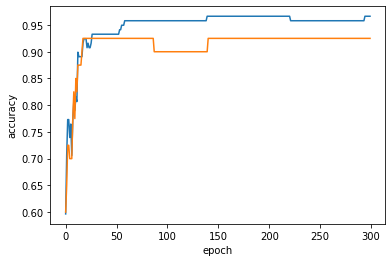

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9663865546218487
0.925
